In [1]:
!pip install selenium

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup 
import time
import pandas as pd

In [18]:
browser = webdriver.Chrome('C:/Users/USER/Desktop/chromedriver.exe')
url ="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)

C:\Users\USER\AppData\Local\Temp\ipykernel_19332\313624672.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:/Users/USER/Desktop/chromedriver.exe')


In [20]:
#페이지 정보 가져오기
html = browser.page_source
soup =  BeautifulSoup(html,'html.parser')

In [22]:
channel_list= soup.select('tr')
print(len(channel_list),'\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [23]:
channel_list= soup.select('form>table>tbody>tr')
print(len(channel_list))

100


In [92]:
#채널 태그 출력 및 태그 구조 확인하기
channel=channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLQkveNLp6kr6R_J-uhi_Zl-MyAXGZ1RqT2qvdJ58g=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLQkveNLp6kr6R_J-uhi_Zl-MyAXGZ1RqT2qvdJ58g=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [93]:
category= channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [94]:
#채널명 찾기
title = channel.select('h1>a')[0].text.strip()
print(title)

BLACKPINK


In [95]:
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select ('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

7550만
244억6121만
395개


In [99]:
channel_list = soup.select('tbody > tr')
for channel in channel_list:
    title = channel.select ('h1>a')[0].text.strip()
    category = channel.select ('p.category')[0].text.strip()
    subscriber=channel.select ('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select ('.video_cnt')[0].text
    print(title,category,subscriber,view,video)

BLACKPINK [음악/댄스/가수] 7550만 244억6121만 395개
BANGTANTV [음악/댄스/가수] 6970만 173억1463만 1,762개
HYBE LABELS [음악/댄스/가수] 6770만 238억1035만 963개
SMTOWN [음악/댄스/가수] 3070만 250억9119만 3,944개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2540만 73억8577만 4,193개
JYP Entertainment [음악/댄스/가수] 2510만 170억3443만 1,497개
1theK (원더케이) [음악/댄스/가수] 2420만 225억2623만 16,878개
Charlie Puth [미분류] 2060만 85억3390만 131개
Mnet K-POP [음악/댄스/가수] 1980만 153억3049만 28,926개
Jimmy Kimmel Live [미분류] 1880만 124억5578만 6,058개
KBS WORLD TV [TV/방송] 1810만 138억6610만 58,208개
JFlaMusic [음악/댄스/가수] 1760만 36억5014만 282개
officialpsy [음악/댄스/가수] 1730만 97억7015만 119개
Jane ASMR 제인 [음식/요리/레시피] 1670만 64억0510만 1,531개
BIGBANG [음악/댄스/가수] 1480만 73억3067만 776개
TWICE [음악/댄스/가수] 1420만 36억6886만 848개
Hongyu ASMR 홍유 [음식/요리/레시피] 1360만 42억3664만 507개
Kendrick Lamar [미분류] 1120만 48억0050만 18개
핑크퐁 (인기 동요・동화) [키즈/어린이] 1080만 66억1822만 2,705개
TheWeekndVEVO [미분류] 1060만 149억5584만 133개
Nao FunFun [키즈/어린이] 1060만 486만 57개
DuDuPopTOY [키즈/어린이] 105

IndexError: list index out of range

In [101]:
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=3
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=4    

SyntaxError: invalid syntax (4084879540.py, line 1)

In [103]:
page =1
url= 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [144]:
results=[]
for page in range(1,11):
    url=f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    browser.get(url)
    time.sleep(2)
    html=browser.page_source
    soup=BeautifulSoup(html,'html.parser')
    channel_list=soup.select('form>table>tbody>tr')
    for channel in channel_list:
        title = channel.select ('h1>a')[0].text.strip()
        category = channel.select ('p.category')[0].text.strip()
        subscriber=channel.select ('.subscriber_cnt')[0].text
        view = channel.select('.view_cnt')[0].text
        video = channel.select ('.video_cnt')[0].text
        data=[title,category,subscriber,view,video]
        results.append(data)

In [145]:
results

[['BLACKPINK', '[음악/댄스/가수]', '7550만', '244억6121만', '395개'],
 ['BANGTANTV', '[음악/댄스/가수]', '6970만', '173억1463만', '1,762개'],
 ['HYBE LABELS', '[음악/댄스/가수]', '6770만', '238억1035만', '963개'],
 ['SMTOWN', '[음악/댄스/가수]', '3070만', '250억9119만', '3,944개'],
 ['Boram Tube Vlog [보람튜브 브이로그]', '[키즈/어린이]', '2650만', '110억5288만', '223개'],
 ['1MILLION Dance Studio', '[음악/댄스/가수]', '2540만', '73억8577만', '4,193개'],
 ['JYP Entertainment', '[음악/댄스/가수]', '2510만', '170억3443만', '1,497개'],
 ['1theK (원더케이)', '[음악/댄스/가수]', '2420만', '225억2623만', '16,878개'],
 ['Charlie Puth', '[미분류]', '2060만', '85억3390만', '131개'],
 ['Mnet K-POP', '[음악/댄스/가수]', '1980만', '153억3049만', '28,926개'],
 ['Jimmy Kimmel Live', '[미분류]', '1880만', '124억5578만', '6,058개'],
 ['KBS WORLD TV', '[TV/방송]', '1810만', '138억6610만', '58,208개'],
 ['JFlaMusic', '[음악/댄스/가수]', '1760만', '36억5014만', '282개'],
 ['officialpsy', '[음악/댄스/가수]', '1730만', '97억7015만', '119개'],
 ['Jane ASMR 제인', '[음식/요리/레시피]', '1670만', '64억0510만', '1,531개'],
 ['BIGBANG', '[음악/댄스/가수]', '1480만', '7

In [146]:
df=pd.DataFrame(results)
df.columns=['title','category','subscriber','view','video']
df.to_excel('C:\\Users\\USER\\Desktop\\youtube_rank.xlsx',index=False)

In [126]:
##유튜브 랭킹 데이터 시각화

In [147]:
import pandas as pd 
import matplotlib.pyplot as plt


In [149]:
#한글을 표시하기 위한 글꼴 설정
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


In [150]:
df=pd.read_excel('C:\\Users\\USER\\Desktop\\youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],7550만,244억6121만,395개
1,BANGTANTV,[음악/댄스/가수],6970만,173억1463만,"1,762개"
2,HYBE LABELS,[음악/댄스/가수],6770만,238억1035만,963개
3,SMTOWN,[음악/댄스/가수],3070만,250억9119만,"3,944개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [152]:
df.tail()

,title,category,subscriber,view,video
995,티키틱 TIKITIK,[TV/방송],62만,1억4873만,164개
996,깨박이,[BJ/인물/연예인],62만,3억6115만,"1,258개"
997,땡깡DanceKang,[미분류],61만,2억5283만,177개
998,임선비,[게임],61만,3억2992만,"1,118개"
999,춤추는곰돌,[미분류],61만,3억3547만,"2,505개"


In [155]:
#값들 뒤에 만이라는 글자를 숫자로 대체
df['replaced_subscriber']=df['subscriber'].str.replace('만','0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],7550만,244억6121만,395개,75500000
1,BANGTANTV,[음악/댄스/가수],6970만,173억1463만,"1,762개",69700000
2,HYBE LABELS,[음악/댄스/가수],6770만,238억1035만,963개,67700000
3,SMTOWN,[음악/댄스/가수],3070만,250억9119만,"3,944개",30700000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [158]:
#구독자 데이터 타입 int로 바꾸기

In [161]:
df['replaced_subscriber']=df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [163]:
#카테고리별 구독자 수, 채널 수 피봇 데이블 생성하기
pivot_df = df.pivot_table(index = 'category',values = 'replaced_subscriber',aggfunc=['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],98170000,63
[IT/기술/컴퓨터],8650000,7
[TV/방송],257770000,137
[게임],67490000,60
[교육/강의],26550000,21


In [168]:
pivot_df.columns= ['subscriber_sum','category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[음악/댄스/가수],769810000,166
[키즈/어린이],275560000,87
[TV/방송],257770000,137
[미분류],228750000,160
[음식/요리/레시피],203900000,80


In [169]:
#각 칼럼명 인덱스 초기화 하기
pivot_df=pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[음악/댄스/가수],769810000,166
1,[키즈/어린이],275560000,87
2,[TV/방송],257770000,137
3,[미분류],228750000,160
4,[음식/요리/레시피],203900000,80


In [175]:
#내림차순으로 정리하기
pivot_df=pivot_df.sort_values(by='subscriber_sum',ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
0,[음악/댄스/가수],769810000,166
1,[키즈/어린이],275560000,87
2,[TV/방송],257770000,137
3,[미분류],228750000,160
4,[음식/요리/레시피],203900000,80


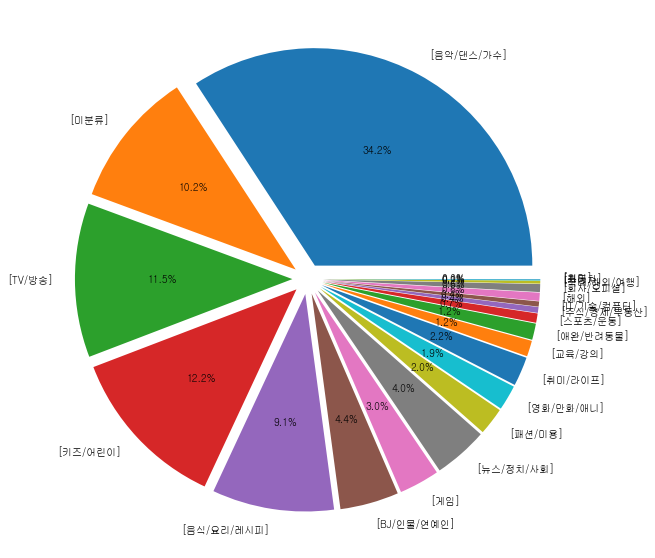

In [194]:
#카테고리별 구독자 수 시각화
plt.figure(figsize=(30,10))
explode=[0.07]*21
plt.pie(pivot_df['subscriber_sum'],
        labels=pivot_df['category'],autopct='%1.1f%%',
        #startangle=90,
        explode=explode)
plt.show()

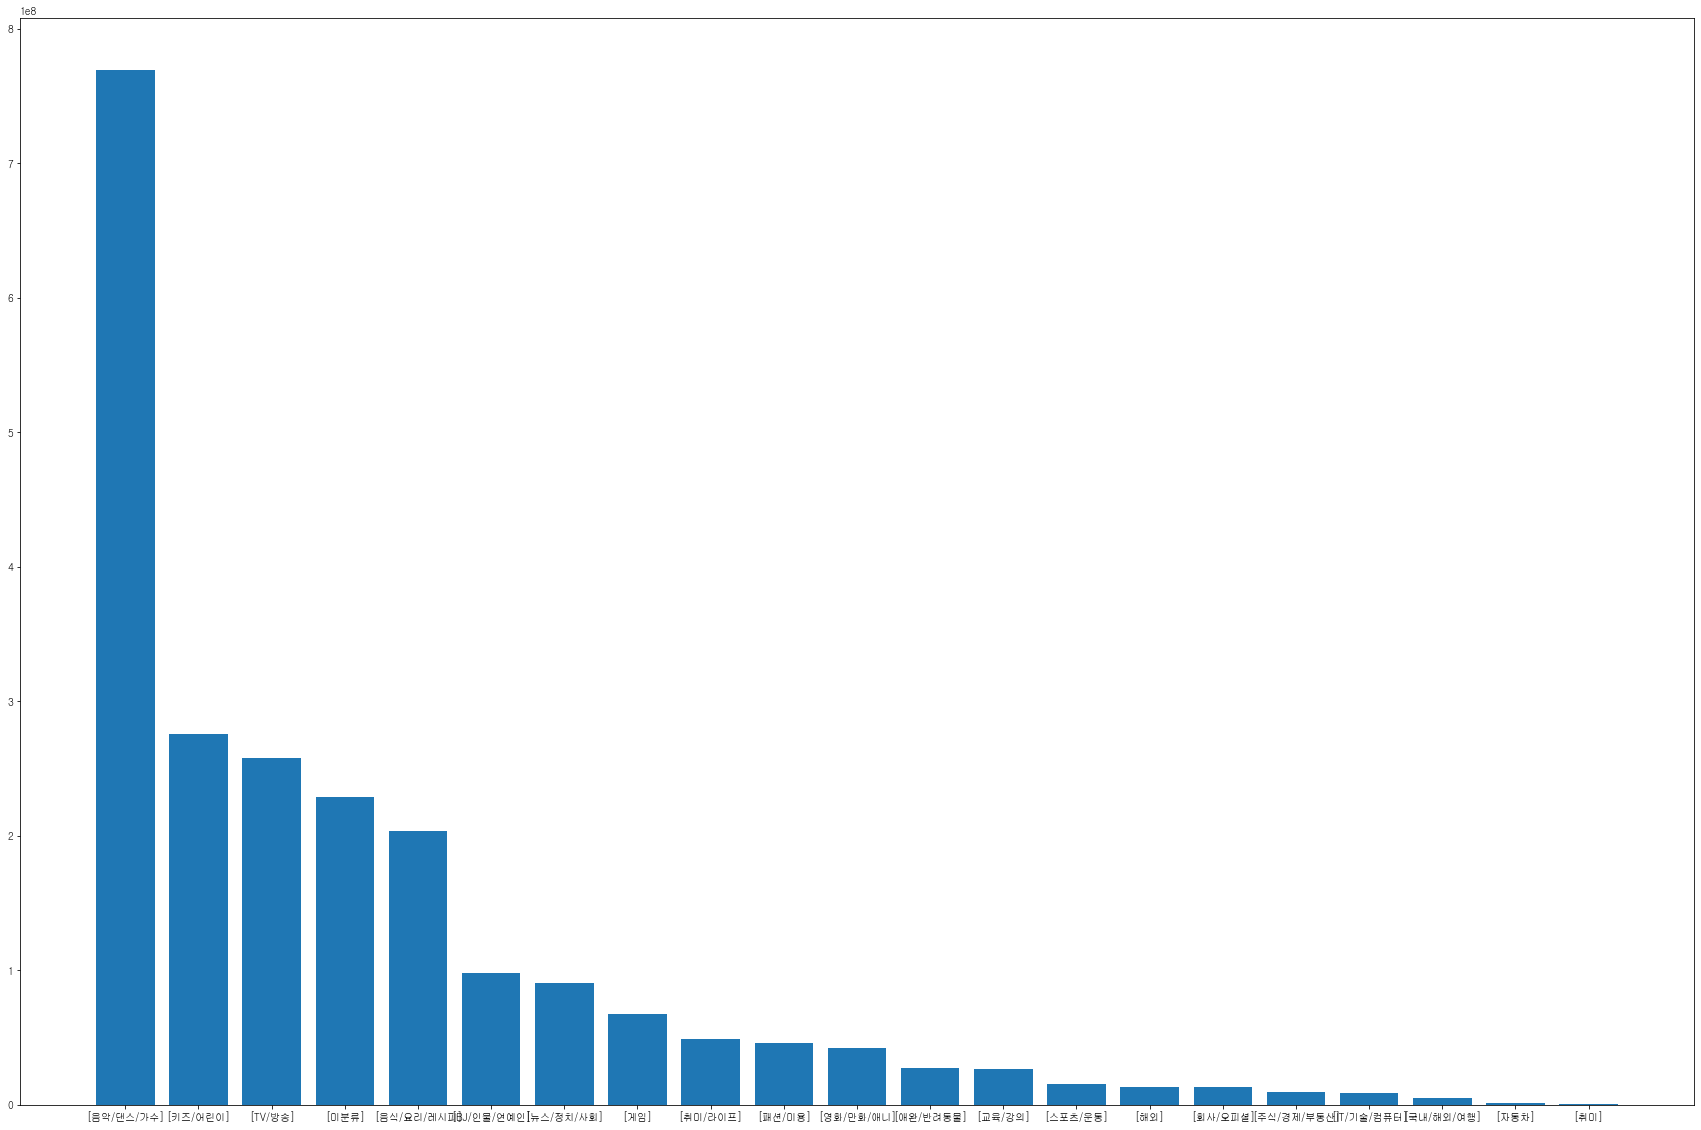

In [191]:
plt.figure(figsize=(30,20))
plt.bar(pivot_df['category'],pivot_df['subscriber_sum'])
plt.show()

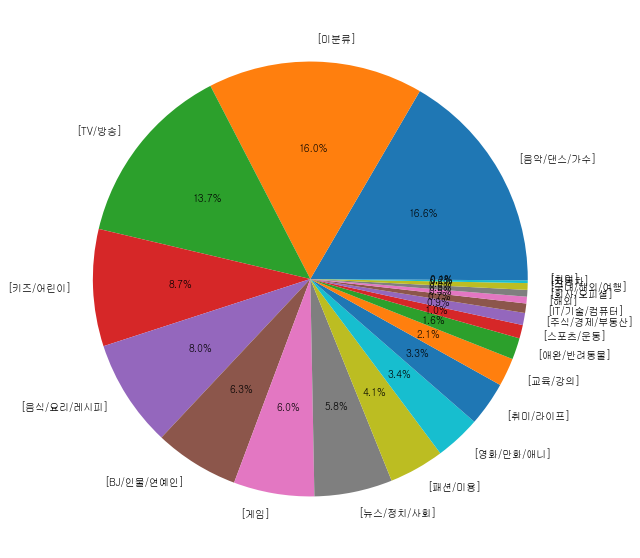

In [193]:
#카테고리별 구독자 수
pivot_df= pivot_df.sort_values(by='category_count',ascending=False)
plt.figure(figsize=(30,10))
plt.pie(pivot_df['category_count'],labels=pivot_df['category'],autopct='%1.1f%%')
plt.show()